In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
s_train = pd.read_csv('datasets/clean_train.csv')
s_test = pd.read_csv('datasets/clean_test.csv')

In [3]:
lot_train_feat = pd.DataFrame(s_train[['lot_frontage', 'lot_area', 'lot_config', 'lot_shape']])
lot_test_feat = pd.DataFrame(s_train[['lot_frontage', 'lot_area', 'lot_config', 'lot_shape']])

In [4]:
type(lot_train_feat)

pandas.core.frame.DataFrame

In [5]:
#Trying out a very small model first. 
features = ['lot_frontage', 'lot_area', 'lot_config', 'lot_shape']
X = s_train[features]
y = s_train['saleprice']
X_test_data = s_test[features]
print(X.describe())
print(y.describe())

       lot_frontage       lot_area   lot_config    lot_shape
count   2051.000000    2051.000000  2051.000000  2051.000000
mean      57.944417   10065.208191     1.402730     1.404193
std       33.137332    6742.488909     0.772498     0.566514
min        0.000000    1300.000000     1.000000     1.000000
25%       43.500000    7500.000000     1.000000     1.000000
50%       63.000000    9430.000000     1.000000     1.000000
75%       78.000000   11513.500000     2.000000     2.000000
max      313.000000  159000.000000     5.000000     4.000000
count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64


In [6]:
X.isnull().sum()

lot_frontage    0
lot_area        0
lot_config      0
lot_shape       0
dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=76)

In [8]:
# plt.figure(figsize=(15,15))
# sns.heatmap(s_train.corr(), annot=True)

In [9]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
X_scaled.shape

(1640, 4)

In [11]:
type(X_scaled)

numpy.ndarray

In [12]:
X_test_scaled.shape

(411, 4)

In [13]:
X_train.corr(),s_train['saleprice'].sort_values()

(              lot_frontage  lot_area  lot_config  lot_shape
 lot_frontage      1.000000  0.119658   -0.091879  -0.179760
 lot_area          0.119658  1.000000    0.194138   0.302564
 lot_config       -0.091879  0.194138    1.000000   0.263513
 lot_shape        -0.179760  0.302564    0.263513   1.000000,
 1628     12789
 183      13100
 1309     34900
 1292     35000
 1518     35311
          ...  
 151     556581
 1796    582933
 1692    584500
 1964    591587
 1671    611657
 Name: saleprice, Length: 2051, dtype: int64)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr_scores = cross_val_score(lr, X_scaled, y_train, cv=3)
lr_scores.mean()

0.15998033415219529

In [17]:
lasso = LassoCV(n_alphas=30)

In [18]:
lasso.fit(X_scaled, y_train)

LassoCV(n_alphas=30)

In [19]:
lasso.alpha_

1317.1995974387794

In [20]:
np.shape(lasso.coef_)

(4,)

In [21]:
lasso_scores = cross_val_score(lasso, X_test_scaled, y_test, cv=3)
lasso_scores.mean()

0.14127573642354174

### Testing with Ridge Model ###

In [22]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [23]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.15953748346631133

In [24]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [25]:
ridge.score(X_train, y_train)

0.170889044034361

In [26]:
ridge.score(X_test, y_test)

0.17751468841944962

In [27]:
ridge_scores.mean()

0.15953748346631133

In [28]:
pred = ridge.predict(X_test)
pred[:10]

array([296834.77467679, 160043.92906174, 152201.56229612, 209248.66025256,
       152201.56229612, 182957.92268379, 158906.7486392 , 137921.88710388,
       187435.19980267, 152201.56229612])

In [29]:
residuals = y_test - pred

In [30]:
residuals

1885   -112984.774677
1532    -39293.929062
785     -24701.562296
1642    -63748.660253
853       4798.437704
            ...      
174     -61185.093979
411     -21972.278520
1718    -25476.867943
437     -78074.037749
1148    -56381.434174
Name: saleprice, Length: 411, dtype: float64

In [31]:
pred[:10]

array([296834.77467679, 160043.92906174, 152201.56229612, 209248.66025256,
       152201.56229612, 182957.92268379, 158906.7486392 , 137921.88710388,
       187435.19980267, 152201.56229612])

In [32]:
r2_score(y_test, pred)

0.17751468841944962

<AxesSubplot:>

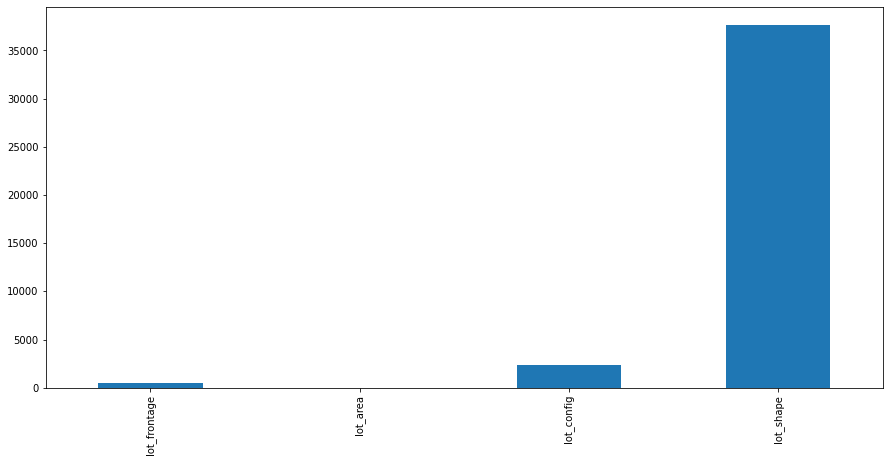

In [33]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

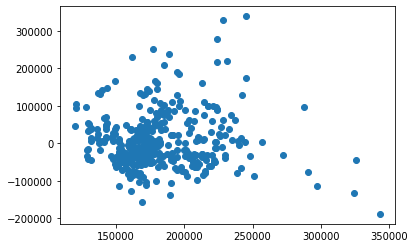

In [34]:
plt.scatter(pred, residuals)

In [35]:
ridge_df = pd.DataFrame([ridge.coef_, features], index = ['Coefficients', 'Features']).T
ridge_df = ridge_df.set_index('Features')
ridge_df['Coefficients'] = np.abs(ridge_df['Coefficients'])
ridge_df = ridge_df.sort_values(by='Coefficients',ascending=False)
ridge_df.head(10)

,Coefficients
Features,
lot_shape,37613.9
lot_config,2302.82
lot_frontage,519.505
lot_area,1.99754


Text(0.5, 0, 'Strenth of Predictor')

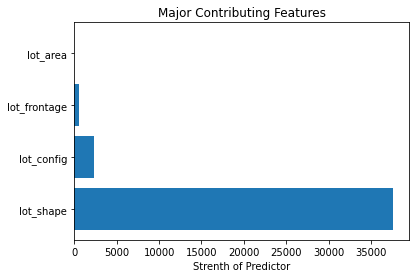

In [36]:
plt.barh(y=ridge_df.index[:10], width=ridge_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strenth of Predictor')

In [37]:
pred = ridge.predict(X_test)
residuals = y_test - pred
residuals[:5]  #look at the first fiveID

1885   -112984.774677
1532    -39293.929062
785     -24701.562296
1642    -63748.660253
853       4798.437704
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Distribution of Residuals')

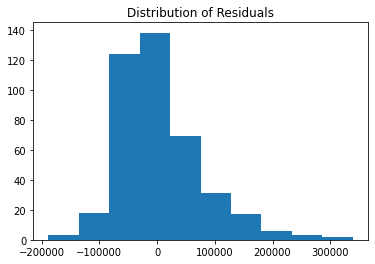

In [38]:
plt.hist(residuals);
plt.title('Distribution of Residuals')

In [39]:
sample_prices = y_test.values[0]
np.log(sample_prices)

12.121875486729419

Text(0.5, 1.0, 'Transformed Residuals')

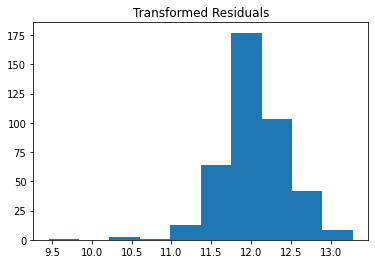

In [40]:
plt.hist(np.log(y_test));
plt.title('Transformed Residuals')

Text(0.5, 1.0, 'Comparing Predicted Prices with Residuals')

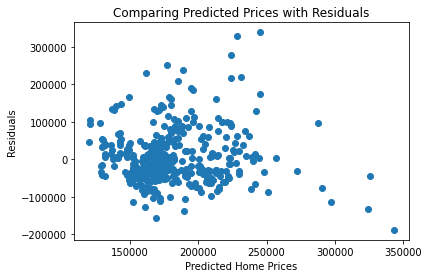

In [41]:
#interdcept 182000
#slope for quality is 19500
plt.scatter(x=pred,y=residuals)
plt.xlabel('Predicted Home Prices')
plt.ylabel('Residuals')
plt.title('Comparing Predicted Prices with Residuals')

# Now with Test data #

In [42]:
s_test.shape

(878, 81)

In [43]:
X_test_data.head()

,lot_frontage,lot_area,lot_config,lot_shape
0,69.0,9142,1,1
1,NaN,9662,1,2
2,58.0,17104,1,2
3,60.0,8520,1,1
4,NaN,9500,1,2


In [44]:
X_test_data.corr(),s_train['saleprice'].sort_values()

(              lot_frontage  lot_area  lot_config  lot_shape
 lot_frontage      1.000000  0.421187    0.050442   0.254028
 lot_area          0.421187  1.000000    0.067606   0.269882
 lot_config        0.050442  0.067606    1.000000   0.292780
 lot_shape         0.254028  0.269882    0.292780   1.000000,
 1628     12789
 183      13100
 1309     34900
 1292     35000
 1518     35311
          ...  
 151     556581
 1796    582933
 1692    584500
 1964    591587
 1671    611657
 Name: saleprice, Length: 2051, dtype: int64)

In [45]:
test_pred = ridge.predict(X_test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
test_pred[:10]

In [ ]:
s_test['saleprice'] = test_pred

In [ ]:
s_test.head()

In [ ]:
y_test_data = s_test['saleprice']

In [ ]:
# Scale test set
X_td_scaled = sc.transform(X_test_data)
# y_td_scaled = sc.transform(y_test_data)

In [ ]:
X_td_scaled.shape

In [ ]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100)).fit(X_td_scaled, y_test_data)
ridge

In [ ]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

In [ ]:
ridge.fit(X_train, y_train)

In [ ]:
ridge.score(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)

In [ ]:
ridge.score(X_td_scaled, y_test_data)

In [ ]:
s_test.columns

In [ ]:
s_test.rename(columns={'id': 'ID', 'saleprice': 'SalePrice'}, errors="raise", inplace=True)

In [ ]:
submission = s_test[['ID', 'SalePrice']]

In [ ]:
submission.to_csv('datasets/submission_1.csv', index=False)